### Import libraries

In [1]:
# libraries
import pandas as pd
import numpy as np
import cv2
import os, os.path
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# This filepath will likely be different for each of us

# Davis
!unzip '/content/gdrive/MyDrive/MDST/dogs-vs-cats/train.zip' -d 'train_data'


!unzip '/content/gdrive/MyDrive/MDST/dogs-vs-cats/train.zip' -d 'train_data'

Streaming output truncated to the last 5000 lines.
  inflating: train_data/train/dog.5501.jpg  
  inflating: train_data/train/dog.5502.jpg  
  inflating: train_data/train/dog.5503.jpg  
  inflating: train_data/train/dog.5504.jpg  
  inflating: train_data/train/dog.5505.jpg  
  inflating: train_data/train/dog.5506.jpg  
  inflating: train_data/train/dog.5507.jpg  
  inflating: train_data/train/dog.5508.jpg  
  inflating: train_data/train/dog.5509.jpg  
  inflating: train_data/train/dog.551.jpg  
  inflating: train_data/train/dog.5510.jpg  
  inflating: train_data/train/dog.5511.jpg  
  inflating: train_data/train/dog.5512.jpg  
  inflating: train_data/train/dog.5513.jpg  
  inflating: train_data/train/dog.5514.jpg  
  inflating: train_data/train/dog.5515.jpg  
  inflating: train_data/train/dog.5516.jpg  
  inflating: train_data/train/dog.5517.jpg  
  inflating: train_data/train/dog.5518.jpg  
  inflating: train_data/train/dog.5519.jpg  
  inflating: train_data/train/dog.552.jpg  
  infl

In [4]:
path = "train_data/train"

### Read in dataset

In [5]:
# Read in data
X = [] # input data
y = [] # response variable (dog or cat)
paths = []

for file in os.listdir(path):
  image_path = os.path.join(path, file)

  # to double check that the paths are correctly categorized into dogs/cats
  paths.append(image_path)

  # read image into X
  img = cv2.imread(image_path) 
  grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(grayscale, dsize = [80, 80])
  X.append(resized_img)

  # add label to y
  if("cat" in image_path):
    y.append(0)
  elif("dog" in image_path):
    y.append(1)
  else:
    print("This image isn't a cat or a dog!")


### Verify the input data

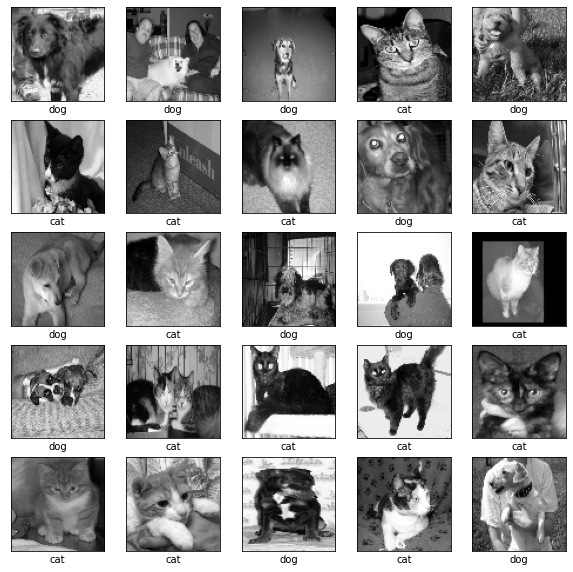

In [6]:
class_names = ['cat', 'dog']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap="gray")
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y[i]])
plt.show()

### Normalizing the data
In this section, we cast X and y into numpy arrays. X contains images that have all been resized to 80x80. 

Then we normalize all of the pixel values to be between 0 and 1 (instead of 0 and 255). 

Then we split the data into training and testing data so we can test our model later on. We've set aside 20% of the data for testing. 

In [7]:
# Cast X and y to numpy arrays
num_train_img = len(X)
X = np.array(X).reshape(num_train_img, 80, 80, 1)
y = np.array(y)

In [8]:
# Normalize pixel values to be between 0 and 1
X = X / 255.0

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Building the model

In [10]:
model = models.Sequential()

# Convolutional layer and maxpool layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer and maxpool layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer and maxpool layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer and maxpool layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# This layer flattens the resulting image array to 1D array
model.add(layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(layers.Dense(512, activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog
# Here we use sigmoid activation functrion which makes out model output to lie between 0 and 1
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.2)


Epoch 1/10
500/500 [==============================] - 190s 379ms/step - loss: 0.6438 - accuracy: 0.6205 - val_loss: 0.5558 - val_accuracy: 0.7245
Epoch 2/10
500/500 [==============================] - 194s 389ms/step - loss: 0.5253 - accuracy: 0.7387 - val_loss: 0.4758 - val_accuracy: 0.7755
Epoch 3/10
500/500 [==============================] - 190s 381ms/step - loss: 0.4399 - accuracy: 0.7932 - val_loss: 0.4428 - val_accuracy: 0.7880
Epoch 4/10
500/500 [==============================] - 190s 381ms/step - loss: 0.3798 - accuracy: 0.8296 - val_loss: 0.3894 - val_accuracy: 0.8275
Epoch 5/10
500/500 [==============================] - 190s 381ms/step - loss: 0.3217 - accuracy: 0.8572 - val_loss: 0.3723 - val_accuracy: 0.8338
Epoch 6/10
500/500 [==============================] - 190s 380ms/step - loss: 0.2732 - accuracy: 0.8827 - val_loss: 0.3687 - val_accuracy: 0.8388
Epoch 7/10
500/500 [==============================] - 192s 384ms/step - loss: 0.2271 - accuracy: 0.9051 - val_loss: 0.3715 -

157/157 - 16s - loss: 0.5087 - accuracy: 0.8424 - 16s/epoch - 103ms/step


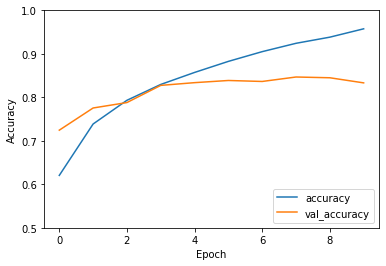

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)